⚡ Loading cached training data...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,272,835 (512.21 MB)

 Trainable params: 16,793,603 (64.06 MB)

 Non-trainable params: 117,479,232 (448.15 MB)

Epoch 1/3
523/523 ━━━━━━━━━━━━━━━━━━━━ 227s 432ms/step - accuracy: 0.9562 - loss: 1.3171 - val_accuracy: 0.9473 - val_loss: 0.3658
Epoch 2/3
523/523 ━━━━━━━━━━━━━━━━━━━━ 256s 489ms/step - accuracy: 0.9793 - loss: 0.2554 - val_accuracy: 0.9667 - val_loss: 0.2049
Epoch 3/3
523/523 ━━━━━━━━━━━━━━━━━━━━ 258s 493ms/step - accuracy: 0.9915 - loss: 0.0479 - val_accuracy: 0.9581 - val_loss: 0.3115


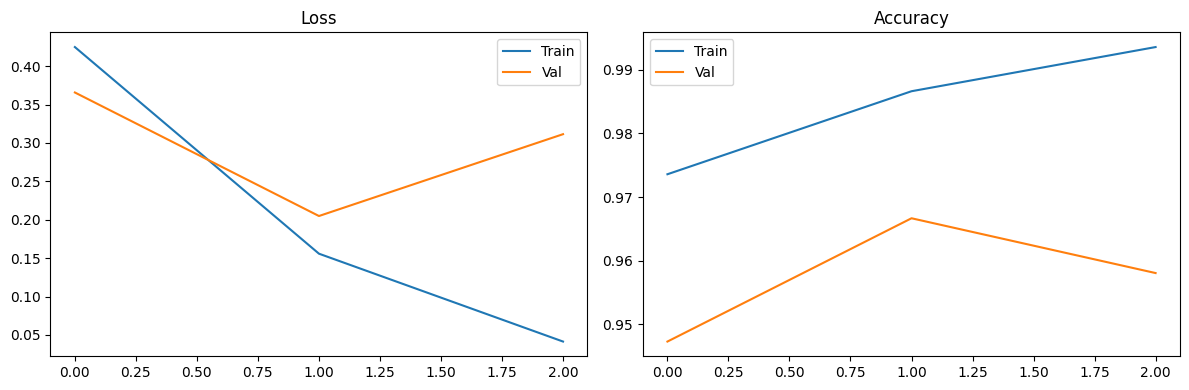

In [9]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras import Model
from tqdm import tqdm

# Paths
image_path = "./Data"
label_path = "./Data_csv"
class_map = {"TV": 1, "Remote": 2}  # Background = 0
max_img_size = 3 * 1024 * 1024  # 3MB

train_images, train_labels = [], []

def get_iou(bb1, bb2):
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    inter_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
    return inter_area / float(bb1_area + bb2_area - inter_area)

cv2.setUseOptimized(True)
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

if os.path.exists("X_train.npy") and os.path.exists("y_train.npy"):
    print("⚡ Loading cached training data...")
    X = np.load("X_train.npy")
    y = np.load("y_train.npy")
else:
    print("🔎 Generating training data...")
    label_files = [f for f in os.listdir(label_path) if f.endswith(".csv")]
    for file in tqdm(label_files, desc="🚀 Processing images"):
        base_name = file.replace(".csv", "")
        image_file = None
        for ext in [".jpg", ".jpeg", ".png"]:
            path = os.path.join(image_path, base_name + ext)
            if os.path.exists(path) and os.path.getsize(path) < max_img_size:
                image_file = path
                break
        if image_file is None:
            continue

        image = cv2.imread(image_file)
        if image is None:
            continue

        with open(os.path.join(label_path, file)) as f:
            lines = f.readlines()[1:]

        gt_boxes = []
        for line in lines:
            parts = line.strip().split()
            if len(parts) < 5:
                continue
            x1, y1, x2, y2, label = int(parts[0]), int(parts[1]), int(parts[2]), int(parts[3]), parts[4]
            gt_boxes.append({'x1': x1, 'y1': y1, 'x2': x2, 'y2': y2, 'label': label})

        ss.setBaseImage(image)
        ss.switchToSelectiveSearchFast()
        proposals = ss.process()[:1500]

        pos, neg = 0, 0
        for (x, y, w, h) in proposals:
            if w * h < 1500:
                continue
            roi = image[y:y+h, x:x+w]
            if roi.shape[0] == 0 or roi.shape[1] == 0:
                continue

            box = {'x1': x, 'y1': y, 'x2': x+w, 'y2': y+h}
            ious = [get_iou(box, gt) for gt in gt_boxes]
            if not ious:
                continue
            max_iou = max(ious)
            label = gt_boxes[np.argmax(ious)]["label"]

            resized = cv2.resize(roi, (224, 224))
            if max_iou > 0.7 and pos < 50:
                train_images.append(resized)
                train_labels.append(class_map[label])
                pos += 1
            elif max_iou < 0.3 and neg < 50:
                train_images.append(resized)
                train_labels.append(0)
                neg += 1
            if pos >= 50 and neg >= 50:
                break

    X = np.array(train_images)
    y = np.array(train_labels)
    np.save("X_train.npy", X)
    np.save("y_train.npy", y)

# === STEP 2: Model ===
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, weights='imagenet')
for layer in vgg.layers[:-2]:
    layer.trainable = False

x = vgg.get_layer("fc2").output
x = Dense(3, activation='softmax')(x)  # [bg, TV, Remote]
model = Model(vgg.input, x)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

# === STEP 3: Train ===
history = model.fit(X, y, batch_size=16, epochs=3, validation_split=0.1, shuffle=True)
model.save("multiclass_model.h5")

# === STEP 4: Plot ===
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(["Train", "Val"])
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["Train", "Val"])
plt.tight_layout()
plt.savefig("training_debug_plots.png")
plt.show()

# === STEP 5: Inference ===
def non_max_suppression(boxes, thresh):
    if len(boxes) == 0: return []
    boxes = np.array(boxes)
    x1, y1, x2, y2, scores = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3], boxes[:, 4]
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(scores)
    pick = []
    while len(idxs) > 0:
        last = idxs[-1]
        pick.append(last)
        xx1 = np.maximum(x1[last], x1[idxs[:-1]])
        yy1 = np.maximum(y1[last], y1[idxs[:-1]])
        xx2 = np.minimum(x2[last], x2[idxs[:-1]])
        yy2 = np.minimum(y2[last], y2[idxs[:-1]])
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / area[idxs[:-1]]
        idxs = np.delete(idxs, np.concatenate(([len(idxs) - 1], np.where(overlap > thresh)[0])))
    return boxes[pick].astype("int")

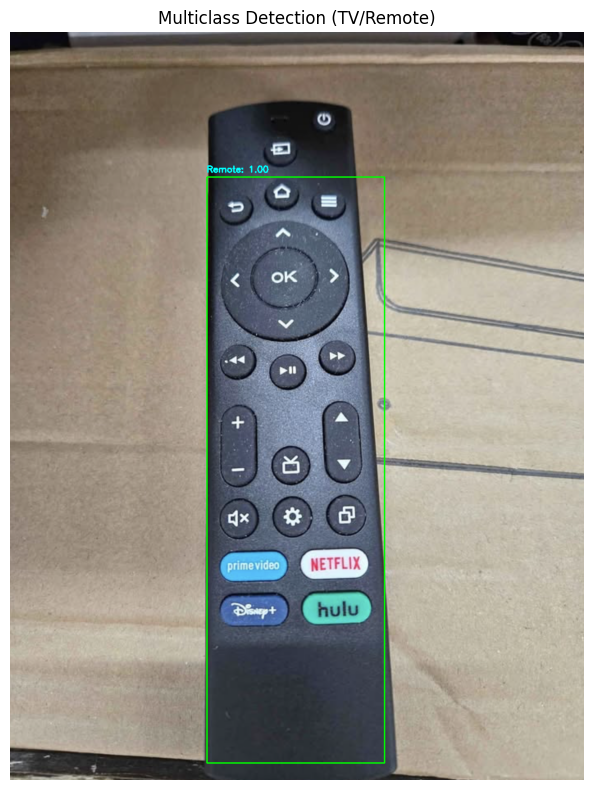

In [10]:
import cv2
# === STEP 6: Test Image ===
test_img_path = "test_remote.png"
img = cv2.imread(test_img_path)
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
proposals = ss.process()[:500]

out_img = img.copy()
detections = []
for (x, y, w, h) in proposals:
    if w < 20 or h < 20:
        continue
    roi = img[y:y+h, x:x+w]
    if roi.shape[0] == 0 or roi.shape[1] == 0:
        continue
    resized = cv2.resize(roi, (224, 224))
    resized = np.expand_dims(resized, axis=0)
    pred = model.predict(resized, verbose=0)[0]
    bg_prob, tv_prob, remote_prob = pred
    conf = max(tv_prob, remote_prob)
    if conf > 0.5 and conf > bg_prob:
        label = "TV" if tv_prob > remote_prob else "Remote"
        detections.append([x, y, x + w, y + h, conf, label])

filtered = []
if detections:
    coords = np.array([[x, y, x2, y2, conf] for x, y, x2, y2, conf, _ in detections])
    keep = non_max_suppression(coords, 0.3)
    for box in keep:
        x1, y1, x2, y2, conf = box
        for b in detections:
            if b[0] == x1 and b[1] == y1 and b[2] == x2 and b[3] == y2:
                filtered.append(b)
                break

for (x1, y1, x2, y2, conf, label) in filtered:
    cv2.rectangle(out_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(out_img, f"{label}: {conf:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
plt.title("Multiclass Detection (TV/Remote)")
plt.axis('off')
plt.tight_layout()
plt.show()
